# Capstone Project

## Case Study 1: How Does a Bike-Share Navigate Speedy Success?
![Alt text](image.png)

### Introduction
<p> Welcome to the Cyclistic bike-share analysis case study! In this case study, you will perform many real-world tasks of a junior data
analyst. You will work for actional company, Cyclistic, and meet diferent characters and team members. In order to answer the
key business questions, you will follow the steps of the data analysis process: ask, prepare, process, analyze, share, and act.
Along the way, the Case Study Roadmap tables — including guiding questions and key tasks — will help you stay on the right path. <p/>

### Scenario
<p> You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of
marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your
team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will
design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your
recommendations, so they must be backed up with compelling data insights and professional data visualizations.<p/>

## Ask

Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

<p> Moreno has assigned you the first question to answer:  <p/>
<p> How do annual members and casual riders use Cyclistic bikes differently? <p/>

You will produce a report with the following deliverables:
1. A clear statement of the business task.
2. A description of all data sources used.
3. Documentation of any cleaning or manipulation of data.
4. A summary of your analysis.
5. Supporting visualizations and key findings.
6. Top three recommendations based on analysis.

1. Statement of the business task:
<p> Understand the difference from how casual riders and annual members uses bikes differently. <p/>

## Prepare

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

### Load Data

In [2]:
dt_q1 = pd.read_csv('Divvy_Trips/Divvy_Trips_2019_Q1.csv')
dt_q2 = pd.read_csv('Divvy_Trips/Divvy_Trips_2019_Q2.csv')
dt_q3 = pd.read_csv('Divvy_Trips/Divvy_Trips_2019_Q3.csv')
dt_q4 = pd.read_csv('Divvy_Trips/Divvy_Trips_2019_Q4.csv')

### Columns
1. trip_id
1. start_time
1. end_time
1. bike_id
1. trip_duration
1. from_station_id
1. from_station_name
1. to_station_id
1. to_station_name
1. usertype
1. gender
1. birthday_year

In [3]:
columns = ['trip_id', 'start_time', 'end_time', 'bike_id', 'trip_duration', 'from_station_id', 'from_station_name',
'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthday_year']

dt_q1.columns = columns
dt_q2.columns = columns
dt_q3.columns = columns
dt_q4.columns = columns

df = pd.concat([dt_q1, dt_q2, dt_q3, dt_q4], ignore_index=True)

In [4]:
df.head()

,trip_id,start_time,end_time,bike_id,trip_duration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthday_year
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [5]:
df.shape

(3818004, 12)

### Convert types

To optimize memory is necessary to choose right data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818004 entries, 0 to 3818003
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_id            int64  
 1   start_time         object 
 2   end_time           object 
 3   bike_id            int64  
 4   trip_duration      object 
 5   from_station_id    int64  
 6   from_station_name  object 
 7   to_station_id      int64  
 8   to_station_name    object 
 9   usertype           object 
 10  gender             object 
 11  birthday_year      float64
dtypes: float64(1), int64(4), object(7)
memory usage: 349.5+ MB


In [7]:
df.describe()

,trip_id,bike_id,from_station_id,to_station_id,birthday_year
count,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06,3.279253e+06
mean,2.391563e+07,3.380252e+03,2.016659e+02,2.026363e+02,1.984074e+03
std,1.212667e+06,1.902511e+03,1.560798e+02,1.562388e+02,1.086898e+01
min,2.174244e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.759000e+03
25%,2.287379e+07,1.727000e+03,7.700000e+01,7.700000e+01,1.979000e+03
50%,2.396232e+07,3.451000e+03,1.740000e+02,1.740000e+02,1.987000e+03
75%,2.496370e+07,5.046000e+03,2.890000e+02,2.910000e+02,1.992000e+03
max,2.596290e+07,6.946000e+03,6.730000e+02,6.730000e+02,2.014000e+03


types of data
* Int16 -- (-32,768 to +32,767)
* Int32 -- (-2,147,483,648 to +2,147,483,647)
* Int64 -- (-9,223,372,036,854,775,808 to +9,223,372,036,854,775,807)
* Float32 -- (-3.4E+38 to +3.4E+38)
* Float64 -- (-1.7E+308 to +1.7E+308)

In [8]:
df['trip_id'] = df['trip_id'].astype('int32')
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['bike_id'] = df['bike_id'].astype('int16')
df['from_station_id'] = df['from_station_id'].astype('int16')
df['to_station_id'] = df['to_station_id'].astype('int16')
df['usertype'] = df['usertype'].astype('category')
df['gender'] = df['gender'].astype('category')
# Like trip_duration is in text is necessary convert type to numeric
df['trip_duration'] = df['trip_duration'].str.replace(',','')
df['trip_duration'] = pd.to_numeric(df['trip_duration'])
df['trip_duration'] = df['trip_duration'].astype('int32')
# To convert to int64 is necessary to manage NaN rows
df['birthday_year'] = df['birthday_year'].fillna(-1).astype('int64')
df['birthday_year'] = df['birthday_year'].astype('int16')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818004 entries, 0 to 3818003
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   trip_id            int32         
 1   start_time         datetime64[ns]
 2   end_time           datetime64[ns]
 3   bike_id            int16         
 4   trip_duration      int32         
 5   from_station_id    int16         
 6   from_station_name  object        
 7   to_station_id      int16         
 8   to_station_name    object        
 9   usertype           category      
 10  gender             category      
 11  birthday_year      int16         
dtypes: category(2), datetime64[ns](2), int16(4), int32(2), object(2)
memory usage: 182.1+ MB


## Process

13. ride_lenght
14. weekday

In [10]:
df['ride_lenght'] = df['end_time'] - df['start_time']

In [11]:
#def convert_to_hh_mm_ss(time_str):
#    time_components = str(time_str).split(' ')[-1].split(':')
#    hours, minutes, seconds = map(int, time_components)
#    return '{:02d}:{:02d}:{:02d}'.format(hours, minutes, seconds)

# Aplicar la función a la columna 'tiempo'
#df['ride_lenght'] = df['ride_lenght'].apply(convert_to_hh_mm_ss)

In [12]:
df['weekday'] = df['start_time'].dt.strftime('%A')

In [13]:
df['rutas'] = df['from_station_name'] + '-' + df['to_station_name']
conteo_combinaciones = Counter(df['rutas'])
conteo_combinaciones = dict(conteo_combinaciones)

In [14]:
df_rutas = pd.DataFrame(conteo_combinaciones.items(), columns=['Route','Frequency'])
df_rutas = df_rutas.sort_values(by='Frequency', ascending=False)
df_rutas.head(15)

,Route,Frequency
1011,Lake Shore Dr & Monroe St-Streeter Dr & Grand Ave,9872
15,Streeter Dr & Grand Ave-Streeter Dr & Grand Ave,9274
4978,Lake Shore Dr & Monroe St-Lake Shore Dr & Monr...,8554
7967,Michigan Ave & Oak St-Michigan Ave & Oak St,5437
7874,Shedd Aquarium-Streeter Dr & Grand Ave,3657
261,Canal St & Adams St-Michigan Ave & Washington St,3649
960,Streeter Dr & Grand Ave-Millennium Park,3376
5125,Streeter Dr & Grand Ave-Lake Shore Dr & Monroe St,3319
3395,Streeter Dr & Grand Ave-Theater on the Lake,3317
2922,Millennium Park-Millennium Park,3082


### DF Processed

In [38]:
df.head(5)

,trip_id,start_time,end_time,bike_id,trip_duration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthday_year,ride_lenght,weekday,rutas
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989,0 days 00:06:30,Tuesday,Wabash Ave & Grand Ave-Milwaukee Ave & Grand Ave
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990,0 days 00:07:21,Tuesday,State St & Randolph St-Dearborn St & Van Buren...
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994,0 days 00:13:49,Tuesday,Racine Ave & 18th St-Western Ave & Fillmore St...
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993,0 days 00:29:43,Tuesday,California Ave & Milwaukee Ave-Clark St & Elm St
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994,0 days 00:06:04,Tuesday,Mies van der Rohe Way & Chicago Ave-Streeter D...


## Analyze

In [39]:
df.describe()

,trip_id,bike_id,trip_duration,from_station_id,to_station_id,birthday_year,ride_lenght
count,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06,3818004
mean,2.391563e+07,3.380252e+03,1.450203e+03,2.016659e+02,2.026363e+02,1.703964e+03,0 days 00:24:10.451397903
std,1.212667e+06,1.902511e+03,2.985414e+04,1.560798e+02,1.562388e+02,6.911433e+02,0 days 08:17:32.263421746
min,2.174244e+07,1.000000e+00,6.100000e+01,1.000000e+00,1.000000e+00,-1.000000e+00,-1 days +23:03:38
25%,2.287379e+07,1.727000e+03,4.110000e+02,7.700000e+01,7.700000e+01,1.969000e+03,0 days 00:06:51
50%,2.396232e+07,3.451000e+03,7.090000e+02,1.740000e+02,1.740000e+02,1.985000e+03,0 days 00:11:49
75%,2.496370e+07,5.046000e+03,1.283000e+03,2.890000e+02,2.910000e+02,1.991000e+03,0 days 00:21:24
max,2.596290e+07,6.946000e+03,1.062840e+07,6.730000e+02,6.730000e+02,2.014000e+03,123 days 01:20:22


#### AVG Trip Duration

In [40]:
avg_trip = df.trip_duration.mean()
print(f"Mean time of trip duration is: {round(avg_trip,2)}s")
print(f"This is approximately: {round(avg_trip/60)} minutes, {round(avg_trip%60)} seconds")

Mean time of trip duration is: 1450.2s
This is approximately: 24 minutes, 10 seconds


In [41]:
print(f"Max ride takes: {df.trip_duration.max()} seconds")
print(f"This is approximately: {round(df.trip_duration.max()/60)} minutes, {round(df.trip_duration.max()%60)} seconds")

Max ride takes: 10628400 seconds
This is approximately: 177140 minutes, 0 seconds


In [19]:
print(f"Avg trip duration for 'Customer': {df[df['usertype'] == 'Customer'].trip_duration.mean()}s")
print(f"Avg trip duration for 'Subscriber': {df[df['usertype'] == 'Subscriber'].trip_duration.mean()}s")


Avg trip duration for 'Customer': 3420.8857293073083s
Avg trip duration for 'Subscriber': 859.383274544856s


#### Trip count by day

In [20]:
df.groupby('weekday').count().reset_index()

,weekday,trip_id,start_time,end_time,bike_id,trip_duration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthday_year,ride_lenght,rutas
0,Friday,578107,578107,578107,578107,578107,578107,578107,578107,578107,578107,500570,578107,578107,578107
1,Monday,560269,560269,560269,560269,560269,560269,560269,560269,560269,560269,495981,560269,560269,560269
2,Saturday,495219,495219,495219,495219,495219,495219,495219,495219,495219,495219,363239,495219,495219,495219
3,Sunday,426420,426420,426420,426420,426420,426420,426420,426420,426420,426420,317511,426420,426420,426420
4,Thursday,588287,588287,588287,588287,588287,588287,588287,588287,588287,588287,524395,588287,588287,588287
5,Tuesday,585680,585680,585680,585680,585680,585680,585680,585680,585680,585680,529641,585680,585680,585680
6,Wednesday,584022,584022,584022,584022,584022,584022,584022,584022,584022,584022,527461,584022,584022,584022


#### Avg Trip Duration by Weekday

In [21]:
df.query("birthday_year >= 1920 and usertype == 'Customer'").groupby('weekday').mean().reset_index()

,weekday,trip_id,bike_id,trip_duration,from_station_id,to_station_id,birthday_year
0,Friday,2.408097e+07,3337.208755,3687.838903,202.664947,199.486712,1987.669876
1,Monday,2.415079e+07,3328.805540,3035.236679,203.002602,202.264403,1987.922250
2,Saturday,2.407880e+07,3318.857831,2590.230955,201.300052,197.127738,1988.120781
3,Sunday,2.413015e+07,3335.487670,2931.703136,204.015625,199.726722,1988.165911
4,Thursday,2.417197e+07,3319.435535,2780.756310,204.850275,204.770358,1988.064837
5,Tuesday,2.415309e+07,3306.487888,3009.949381,206.111612,205.198811,1988.170595
6,Wednesday,2.412242e+07,3325.995973,2728.144468,207.888072,207.886541,1988.236905


In [22]:
df.query("birthday_year >= 1920 and usertype == 'Subscriber'").groupby('weekday').mean().reset_index()

,weekday,trip_id,bike_id,trip_duration,from_station_id,to_station_id,birthday_year
0,Friday,2.385824e+07,3407.615495,833.246630,202.351695,202.587827,1983.241594
1,Monday,2.394345e+07,3391.200379,854.373907,201.525360,203.953064,1983.310207
2,Saturday,2.390787e+07,3411.429995,977.168537,222.579308,221.106433,1985.169788
3,Sunday,2.395561e+07,3409.105424,923.246151,222.359640,222.083792,1985.477587
4,Thursday,2.388198e+07,3392.770439,825.914517,201.092945,202.423228,1983.229550
5,Tuesday,2.389605e+07,3389.303898,848.481395,201.163572,202.335361,1983.174559
6,Wednesday,2.385266e+07,3394.485601,828.040657,201.157746,202.627831,1983.248385


#### Count by bithday year and usertype

In [23]:
df.query("birthday_year >= 1920").groupby(['birthday_year','usertype']).count().reset_index()

,birthday_year,usertype,trip_id,start_time,end_time,bike_id,trip_duration,from_station_id,from_station_name,to_station_id,to_station_name,gender,ride_lenght,weekday,rutas
0,1920,Customer,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1920,Subscriber,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1921,Customer,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1921,Subscriber,247,247,247,247,247,247,247,247,247,247,247,247,247
4,1925,Customer,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2002,Subscriber,1012,1012,1012,1012,1012,1012,1012,1012,1012,1010,1012,1012,1012
154,2003,Customer,292,292,292,292,292,292,292,292,292,290,292,292,292
155,2003,Subscriber,468,468,468,468,468,468,468,468,468,468,468,468,468
156,2014,Customer,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Avg by bithday year and usertype

In [24]:
df.query("birthday_year >= 1920").groupby(['birthday_year','usertype']).mean().reset_index()

,birthday_year,usertype,trip_id,bike_id,trip_duration,from_station_id,to_station_id
0,1920,Customer,2.446692e+07,5727.000000,3743.000000,85.000000,85.000000
1,1920,Subscriber,NaN,NaN,NaN,NaN,NaN
2,1921,Customer,NaN,NaN,NaN,NaN,NaN
3,1921,Subscriber,2.380837e+07,3366.700405,391.016194,355.728745,350.299595
4,1925,Customer,2.455617e+07,3183.500000,853.000000,309.000000,260.000000
...,...,...,...,...,...,...,...
153,2002,Subscriber,2.407744e+07,3279.811265,1150.679842,202.578063,203.635375
154,2003,Customer,2.397461e+07,3377.253425,2424.640411,174.335616,159.256849
155,2003,Subscriber,2.372164e+07,3323.895299,1305.709402,187.923077,181.241453
156,2014,Customer,NaN,NaN,NaN,NaN,NaN


#### Birthday year by usertype

<AxesSubplot:xlabel='birthday_year', ylabel='usertype'>

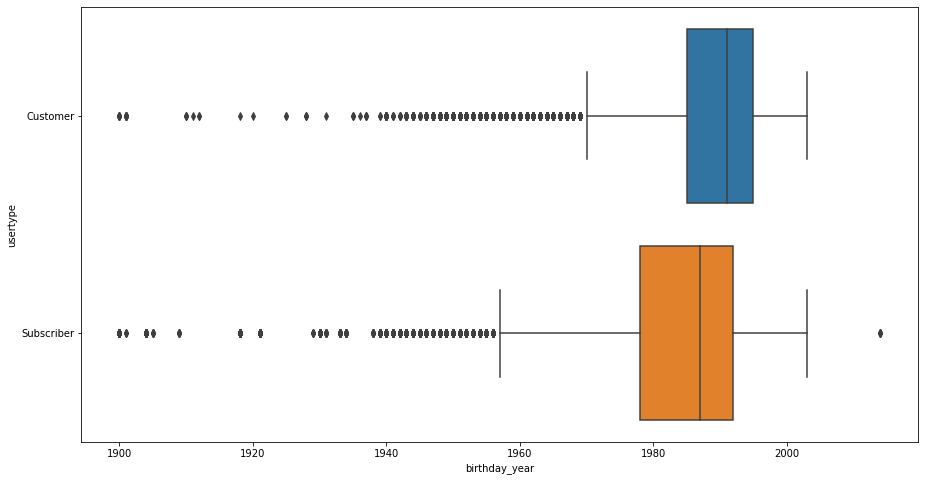

In [25]:
plt.subplots(figsize=(15, 8))
sns.boxplot(data=df.query("birthday_year >= 1900"), x='birthday_year', y='usertype')

#### Trip duration by usertype

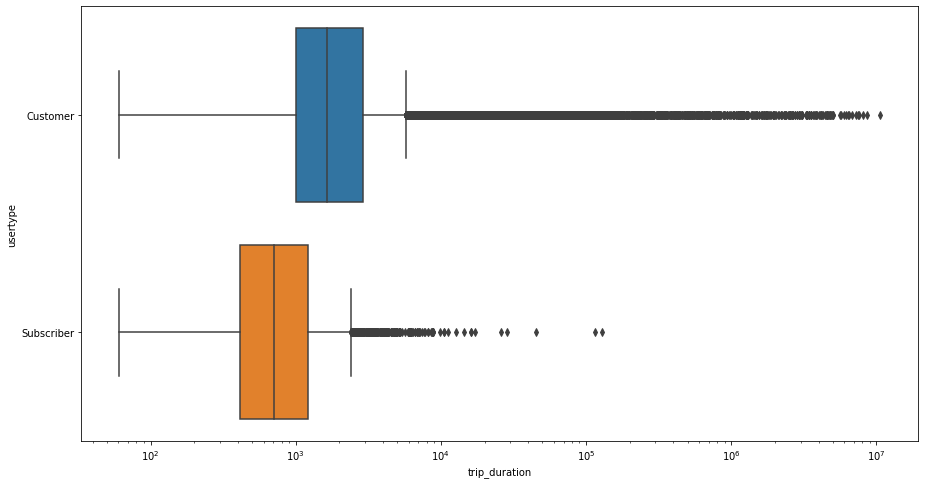

In [26]:
plt.subplots(figsize=(15, 8))
sns.boxplot(data=df.query("birthday_year <= 1900"), x='trip_duration', y='usertype')
plt.xscale('log')

## Share

In [45]:
df_avg_td_suscriber = df.query("birthday_year >= 1920 and usertype == 'Subscriber'").groupby('weekday').mean().reset_index()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convertir la columna 'weekday' en una categoría con el orden deseado
df_avg_td_suscriber['weekday'] = pd.Categorical(df_avg_td_suscriber['weekday'], categories=ordered_days, ordered=True)

# Ordenar el DataFrame por el orden de los días de la semana
df_avg_td_suscriber = df_avg_td_suscriber.sort_values('weekday')

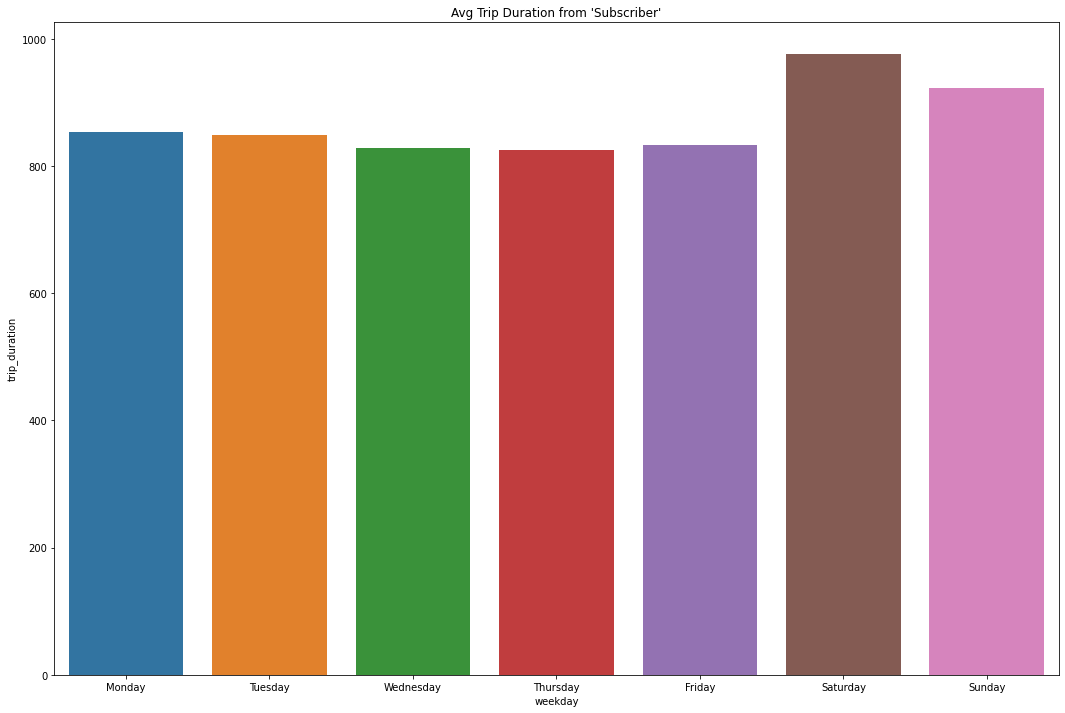

In [50]:
ax = plt.subplots(figsize=(18, 12))
sns.barplot(data=df_avg_td_suscriber,
    x='weekday', y='trip_duration').set(title="Avg Trip Duration from 'Subscriber'")
plt.show();

In [51]:
df_avg_td_customer = df.query("birthday_year >= 1920 and usertype == 'Customer'").groupby('weekday').mean().reset_index()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convertir la columna 'weekday' en una categoría con el orden deseado
df_avg_td_customer['weekday'] = pd.Categorical(df_avg_td_customer['weekday'], categories=ordered_days, ordered=True)

# Ordenar el DataFrame por el orden de los días de la semana
df_avg_td_customer = df_avg_td_customer.sort_values('weekday')

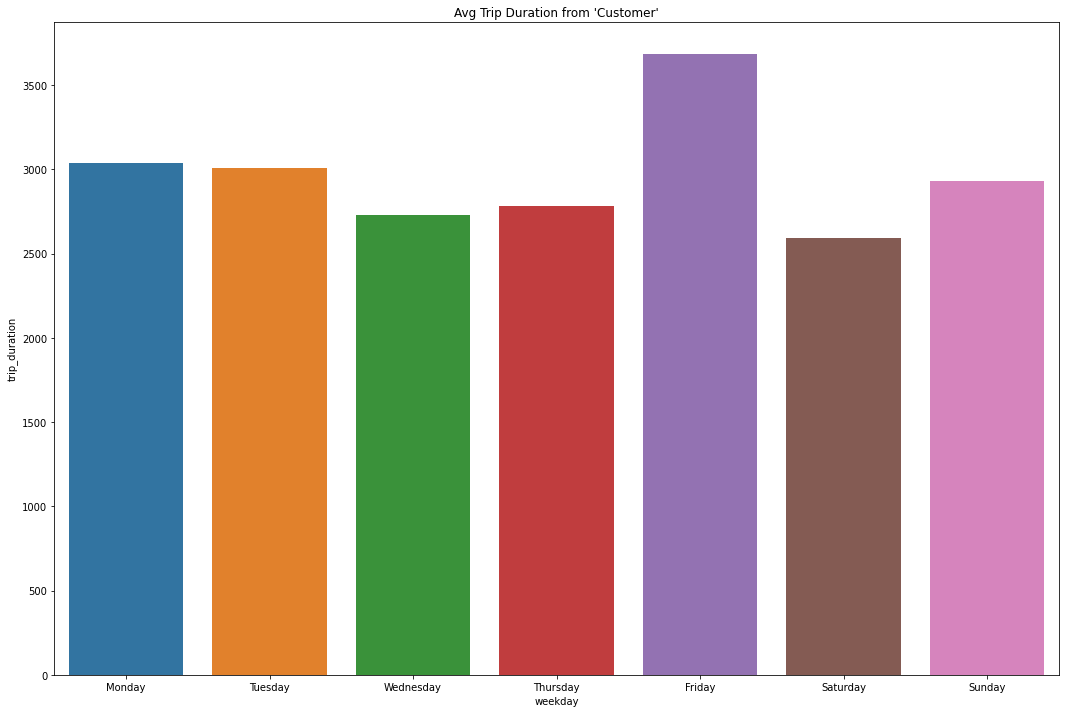

In [52]:
ax = plt.subplots(figsize=(18, 12))
sns.barplot(data=df_avg_td_customer,
    x='weekday', y='trip_duration').set(title="Avg Trip Duration from 'Customer'")
plt.show();

In [57]:
df_count_td_subscriber= df.query("birthday_year >= 1920 and usertype == 'Subscriber'")
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convertir la columna 'weekday' en una categoría con el orden deseado
df_count_td_subscriber['weekday'] = pd.Categorical(df_count_td_subscriber['weekday'], categories=ordered_days, ordered=True)

# Ordenar el DataFrame por el orden de los días de la semana
df_count_td_subscriber = df_count_td_subscriber.sort_values('weekday')

/tmp/ipykernel_25414/1840868565.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_td_subscriber['weekday'] = pd.Categorical(df_count_td_subscriber['weekday'], categories=ordered_days, ordered=True)


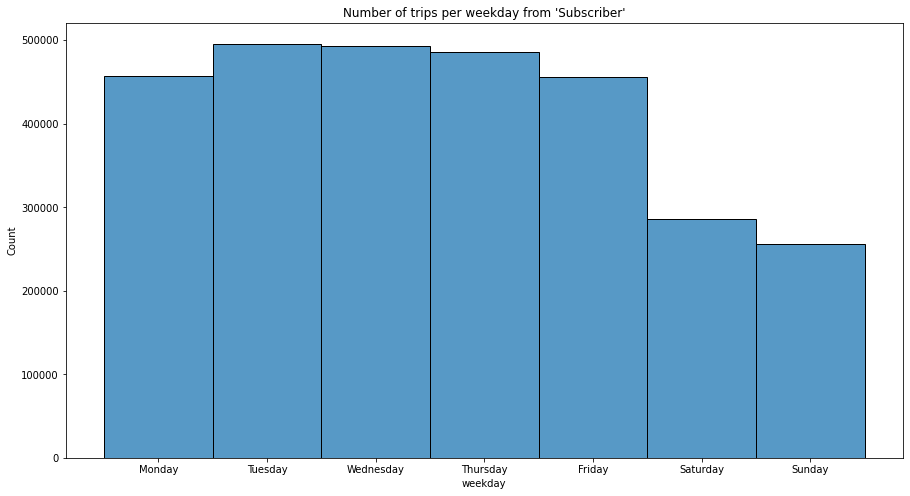

In [58]:
ax = plt.subplots(figsize=(15, 8))
sns.histplot(data=df_count_td_subscriber, x="weekday").set(title="Number of trips per weekday from 'Subscriber'")
plt.show();

In [59]:
df_count_td_customer = df.query("birthday_year >= 1920 and usertype == 'Customer'")
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convertir la columna 'weekday' en una categoría con el orden deseado
df_count_td_customer['weekday'] = pd.Categorical(df_count_td_customer['weekday'], categories=ordered_days, ordered=True)

# Ordenar el DataFrame por el orden de los días de la semana
df_count_td_customer = df_count_td_customer.sort_values('weekday')

/tmp/ipykernel_25414/1652169870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_td_customer['weekday'] = pd.Categorical(df_count_td_customer['weekday'], categories=ordered_days, ordered=True)


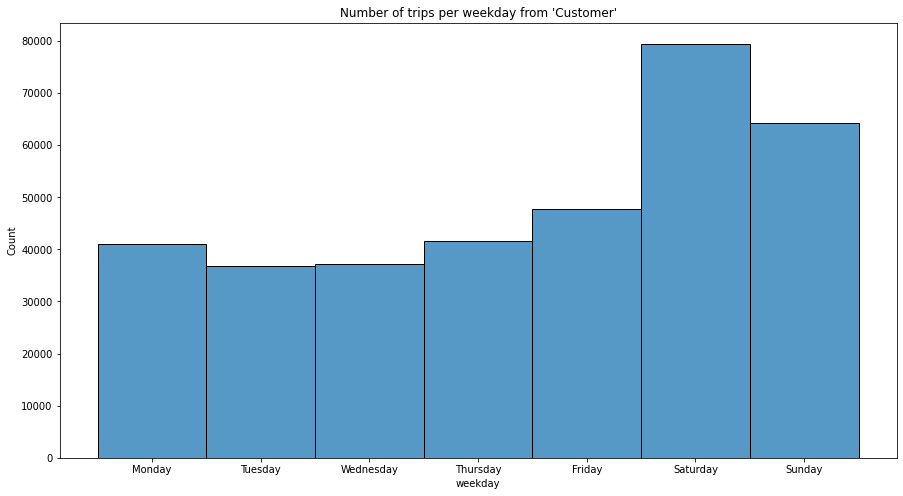

In [60]:
ax = plt.subplots(figsize=(15, 8))
sns.histplot(data=df_count_td_customer, x="weekday").set(title="Number of trips per weekday from 'Customer'")
plt.show();

<AxesSubplot:xlabel='birthday_year', ylabel='trip_duration'>

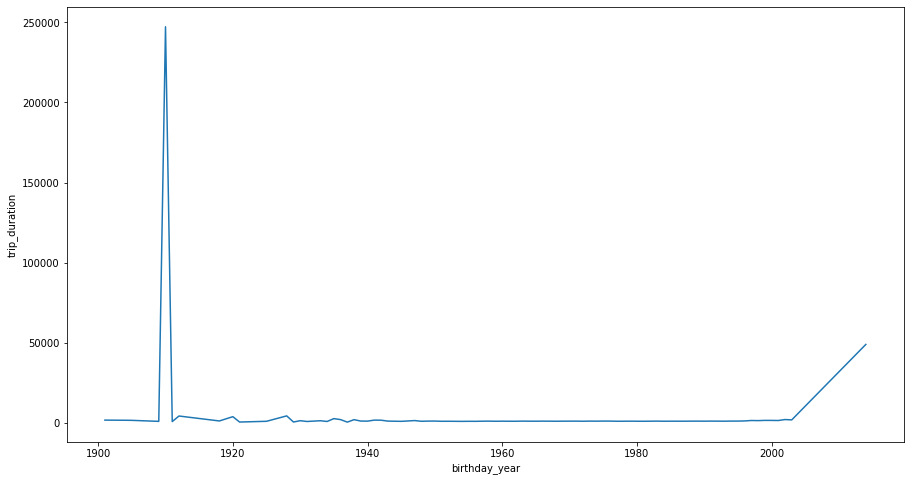

In [61]:
plt.subplots(figsize=(15, 8))
sns.lineplot(data=df.query("birthday_year > 1900 and trip_duration < 500000").groupby('birthday_year')['trip_duration'].mean())

<AxesSubplot:xlabel='birthday_year', ylabel='trip_duration'>

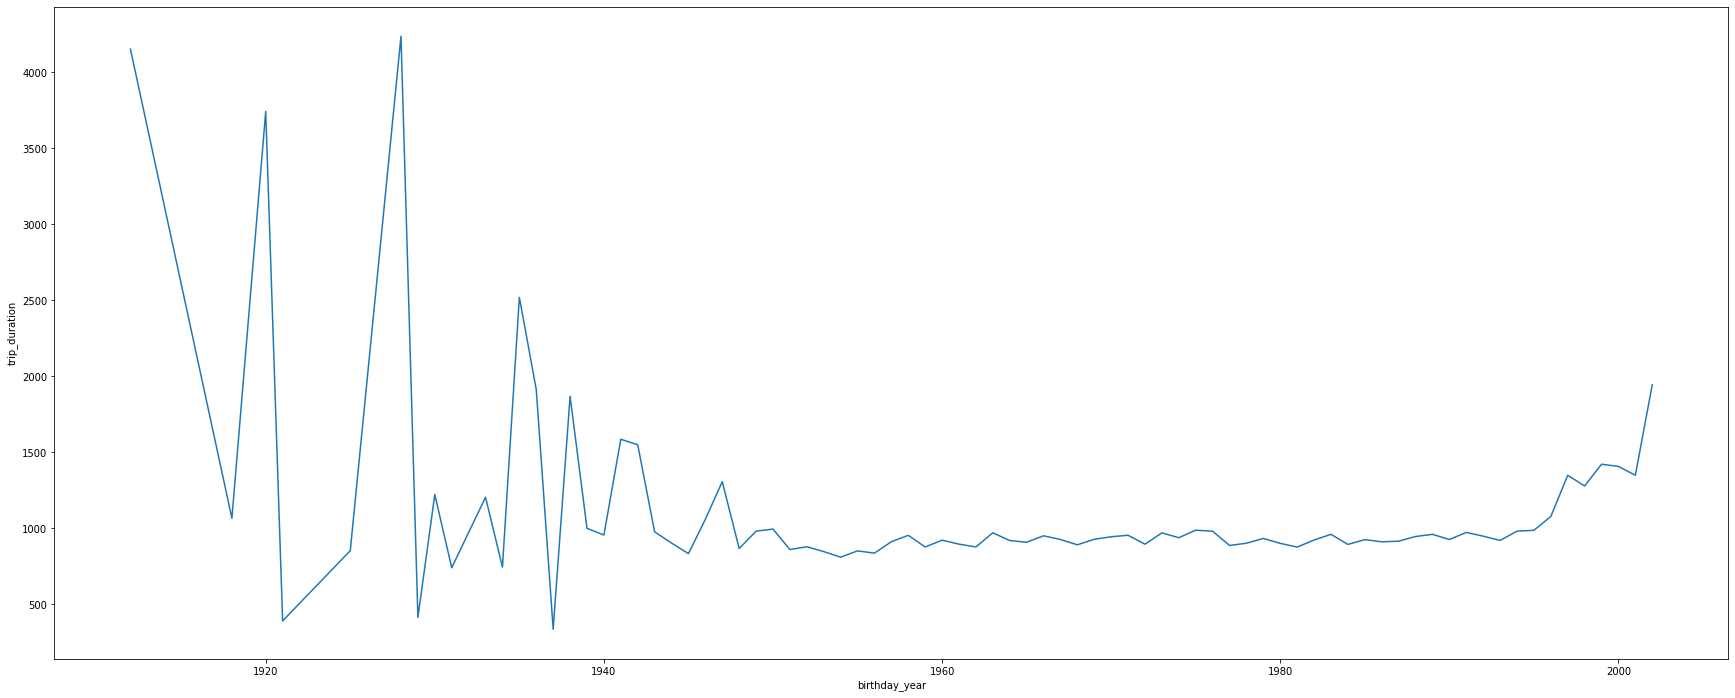

In [35]:
plt.subplots(figsize=(30, 12))
sns.lineplot(data=df.query("birthday_year > 1911 and birthday_year < 2003 and trip_duration < 500000").groupby('birthday_year')['trip_duration'].mean())

<AxesSubplot:xlabel='birthday_year', ylabel='trip_id'>

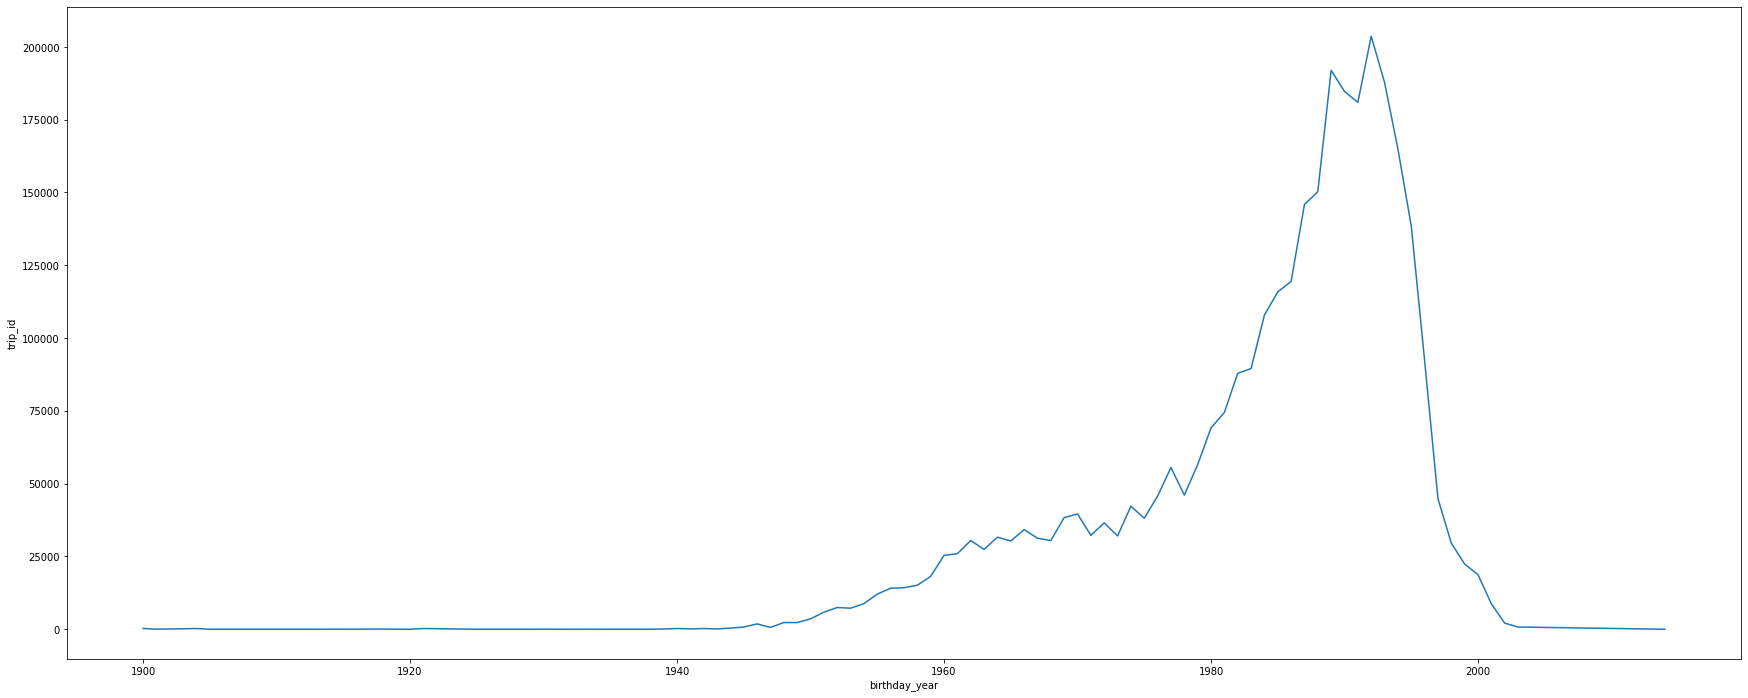

In [64]:
plt.subplots(figsize=(30, 12))
sns.lineplot(data=df.query("birthday_year >= 1900").groupby('birthday_year')['trip_id'].count())

<AxesSubplot:xlabel='birthday_year', ylabel='trip_duration'>

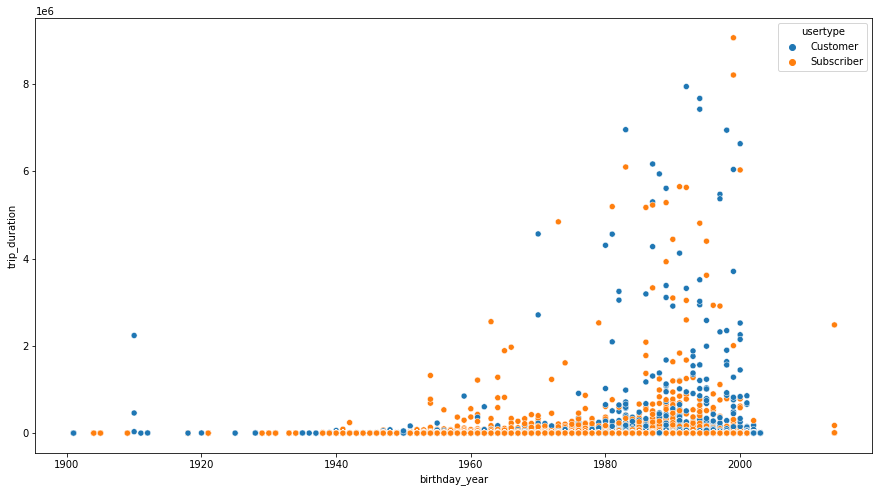

In [65]:
plt.subplots(figsize=(15, 8))
sns.scatterplot(data=df.query("birthday_year > 1900"), x="birthday_year", y="trip_duration", hue="usertype")

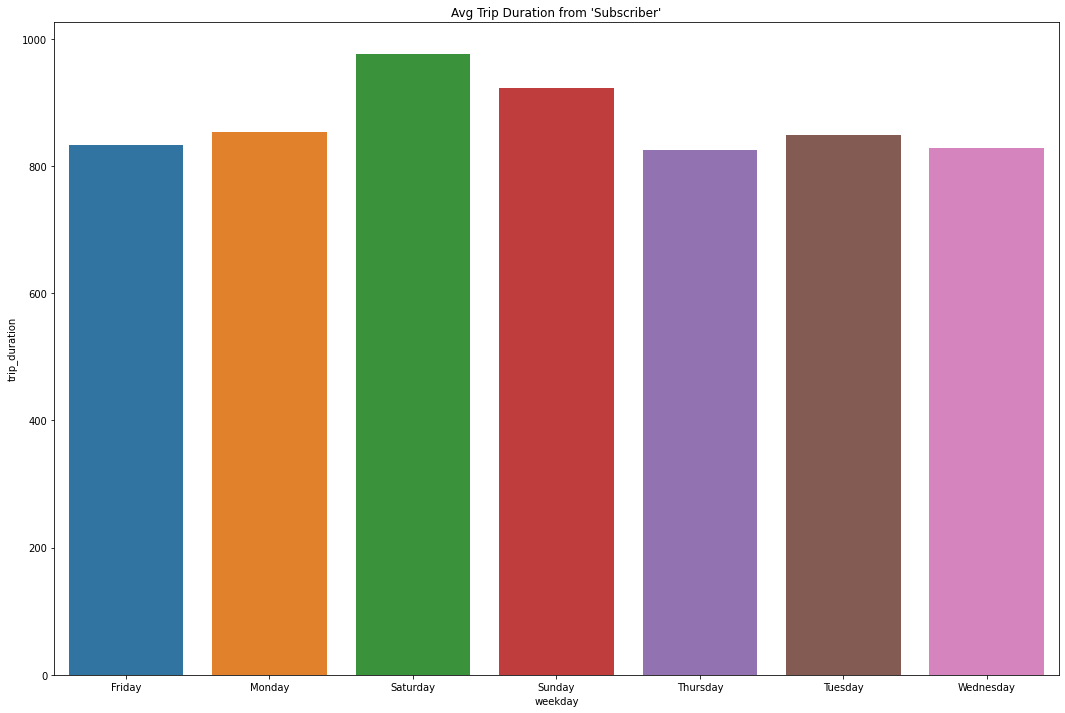

In [66]:
ax = plt.subplots(figsize=(18, 12))
sns.barplot(data=df.query("birthday_year >= 1920 and usertype == 'Subscriber'").groupby('weekday').mean().reset_index(),
    x='weekday', y='trip_duration').set(title="Avg Trip Duration from 'Subscriber'")
plt.show();

In [69]:
df_5 = df.query("birthday_year > 1900 ").groupby(['birthday_year', 'usertype'])['trip_duration'].count().reset_index()

In [70]:
df_5

,birthday_year,usertype,trip_duration
0,1901,Customer,11
1,1901,Subscriber,3
2,1904,Customer,0
3,1904,Subscriber,243
4,1905,Customer,0
...,...,...,...
169,2002,Subscriber,1012
170,2003,Customer,292
171,2003,Subscriber,468
172,2014,Customer,0


<AxesSubplot:xlabel='birthday_year', ylabel='trip_duration'>

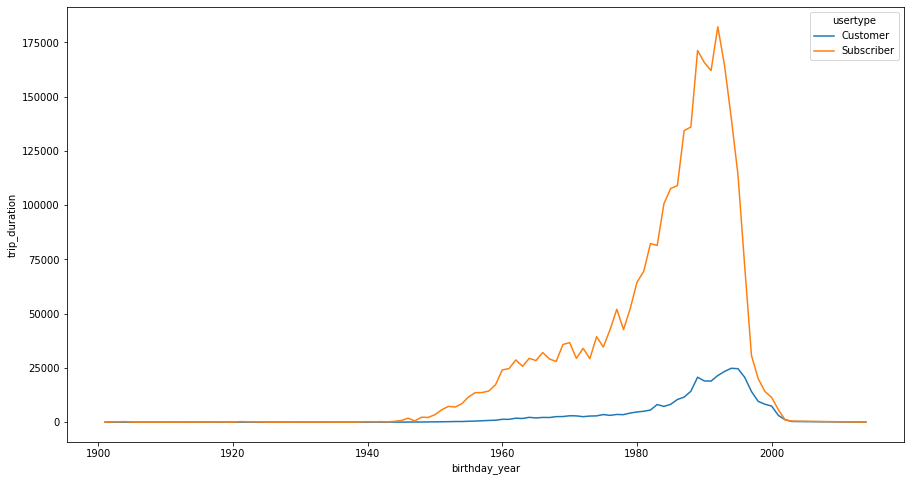

In [71]:
plt.subplots(figsize=(15, 8))
sns.lineplot(data=df_5, x='birthday_year', y='trip_duration', hue='usertype')

## Act

### Avg Trip Duration by Usertype every weekday

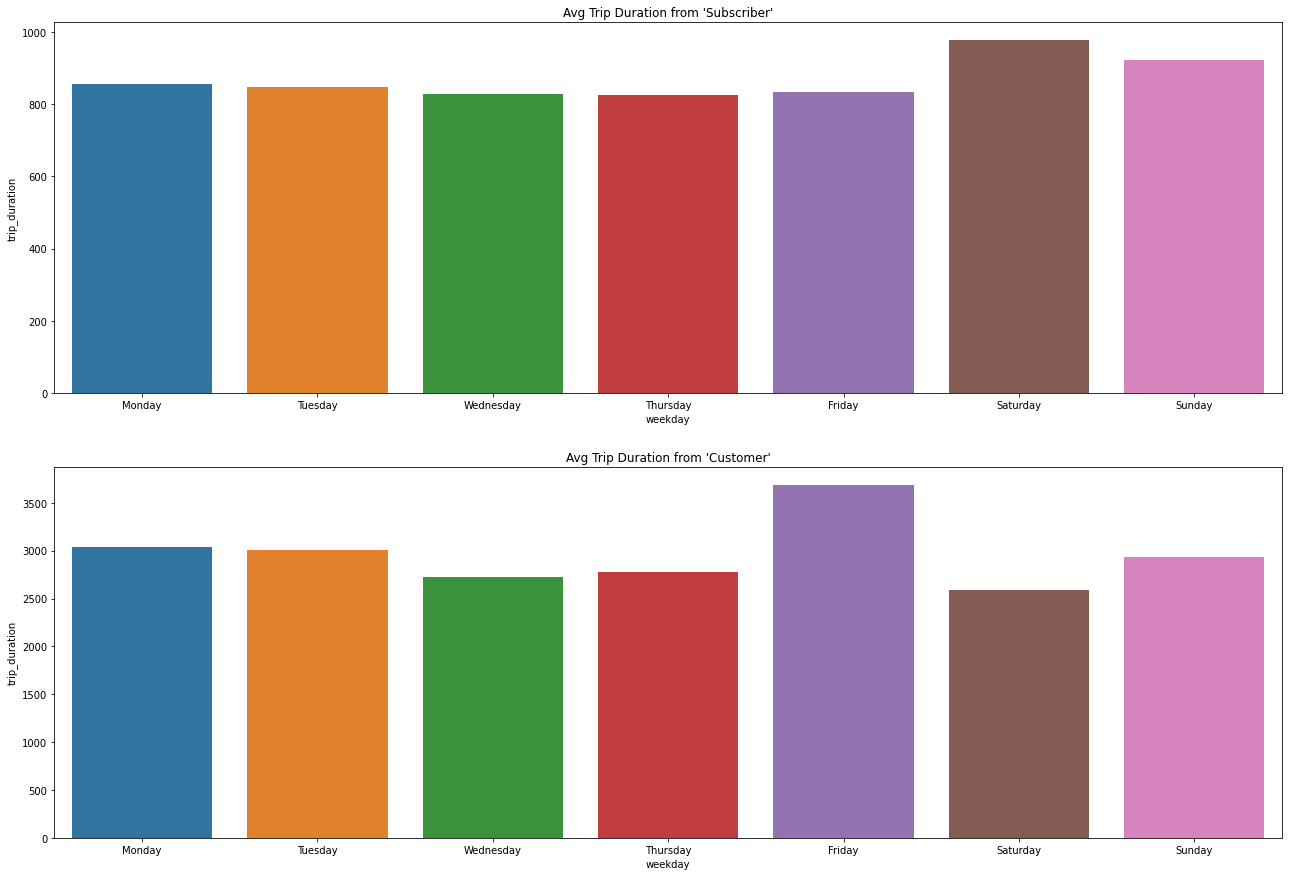

In [76]:
fig, axes = plt.subplots(2,1, figsize=(22, 15))
#create chart in each subplot
sns.barplot(data=df_avg_td_suscriber, x='weekday', y='trip_duration', ax=axes[0]).set(title="Avg Trip Duration from 'Subscriber'")
sns.barplot(data=df_avg_td_customer,   x='weekday', y='trip_duration', ax=axes[1]).set(title="Avg Trip Duration from 'Customer'")
plt.show();

### Trip count by Usertype every weekday

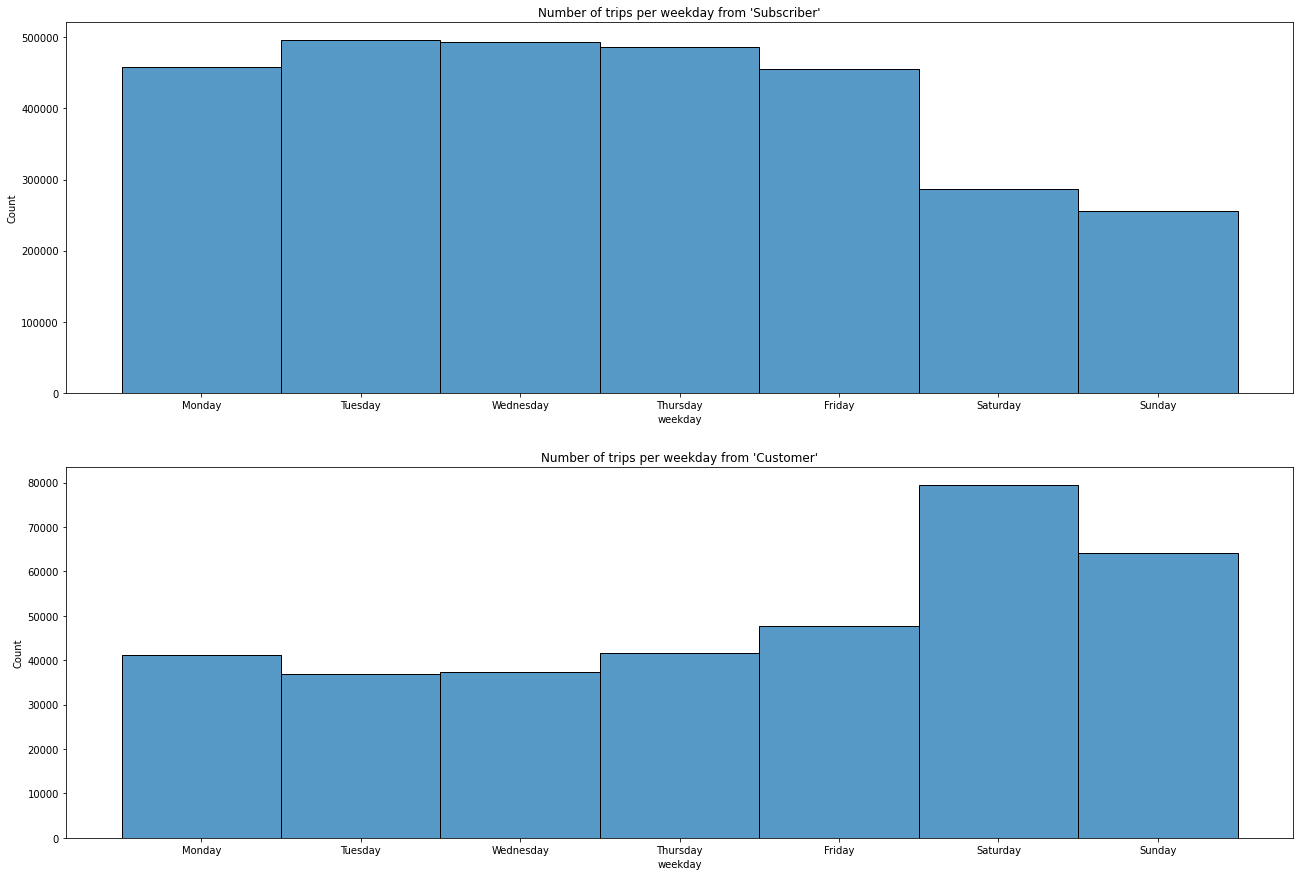

In [78]:
fig, axes = plt.subplots(2,1, figsize=(22, 15))
#create chart in each subplot
sns.histplot(data=df_count_td_subscriber, x="weekday", ax=axes[0]).set(title="Number of trips per weekday from 'Subscriber'")
sns.histplot(data=df_count_td_customer, x="weekday", ax=axes[1]).set(title="Number of trips per weekday from 'Customer'")
plt.show();

From previous graphs we can get the next conclusions:
1. Avg trip duration of 'Subcribers' is less compared to 'Customers'.

1. Avg trip duration from 'Subcribers' is very similar along the week. On the other hand, there is a peak of use on Friday for 'Customers' and a fall on Saturday.
1. 'Subcriber' have a lot more of trips compared to 'Customers' but these last use the serice for more time.
1. Number of trips from 'Subscribers' are along the week but decrease on weekend. Probably they use the service to move to work.
1. Number of trips from 'Customers' are less on the week but with an increment on the weekend of almost twice. Probably because they use the service as a hobby.

### A lot of ourliers values from trip duration

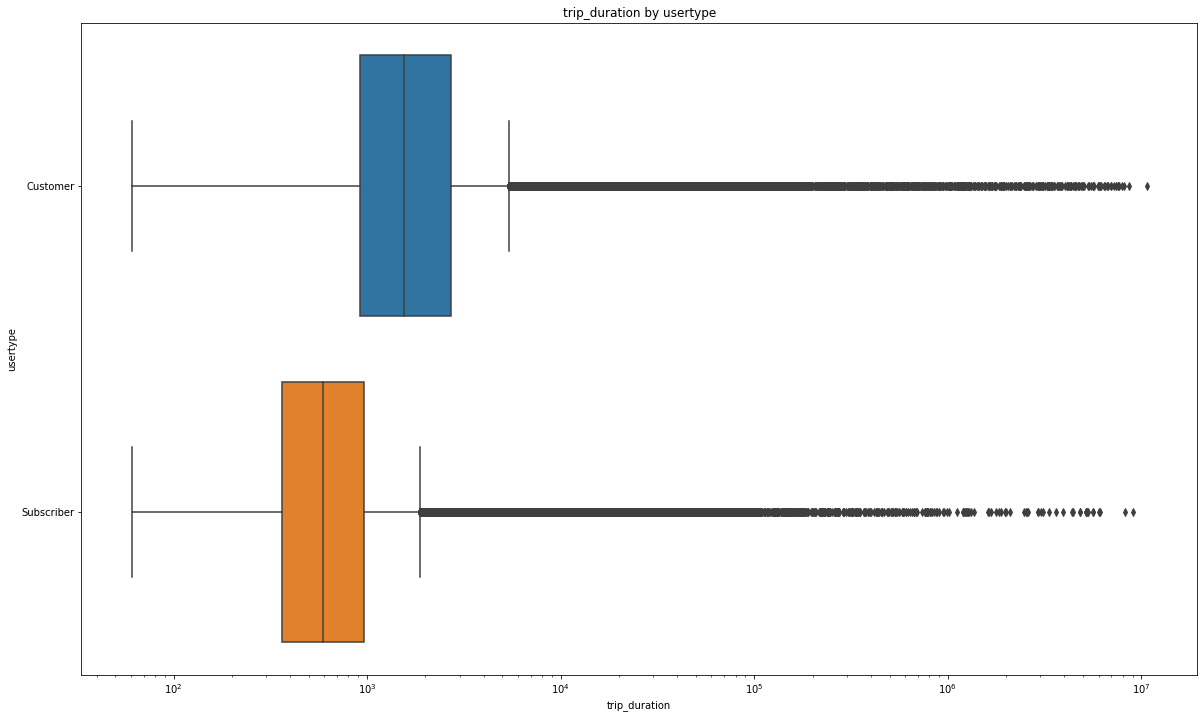

In [102]:
plt.subplots(figsize=(20, 12))
sns.boxplot(data=df, x='trip_duration', y='usertype').set(title="trip_duration by usertype")
plt.xscale('log')

### Most of 'Customers' birthday year register are wrong.

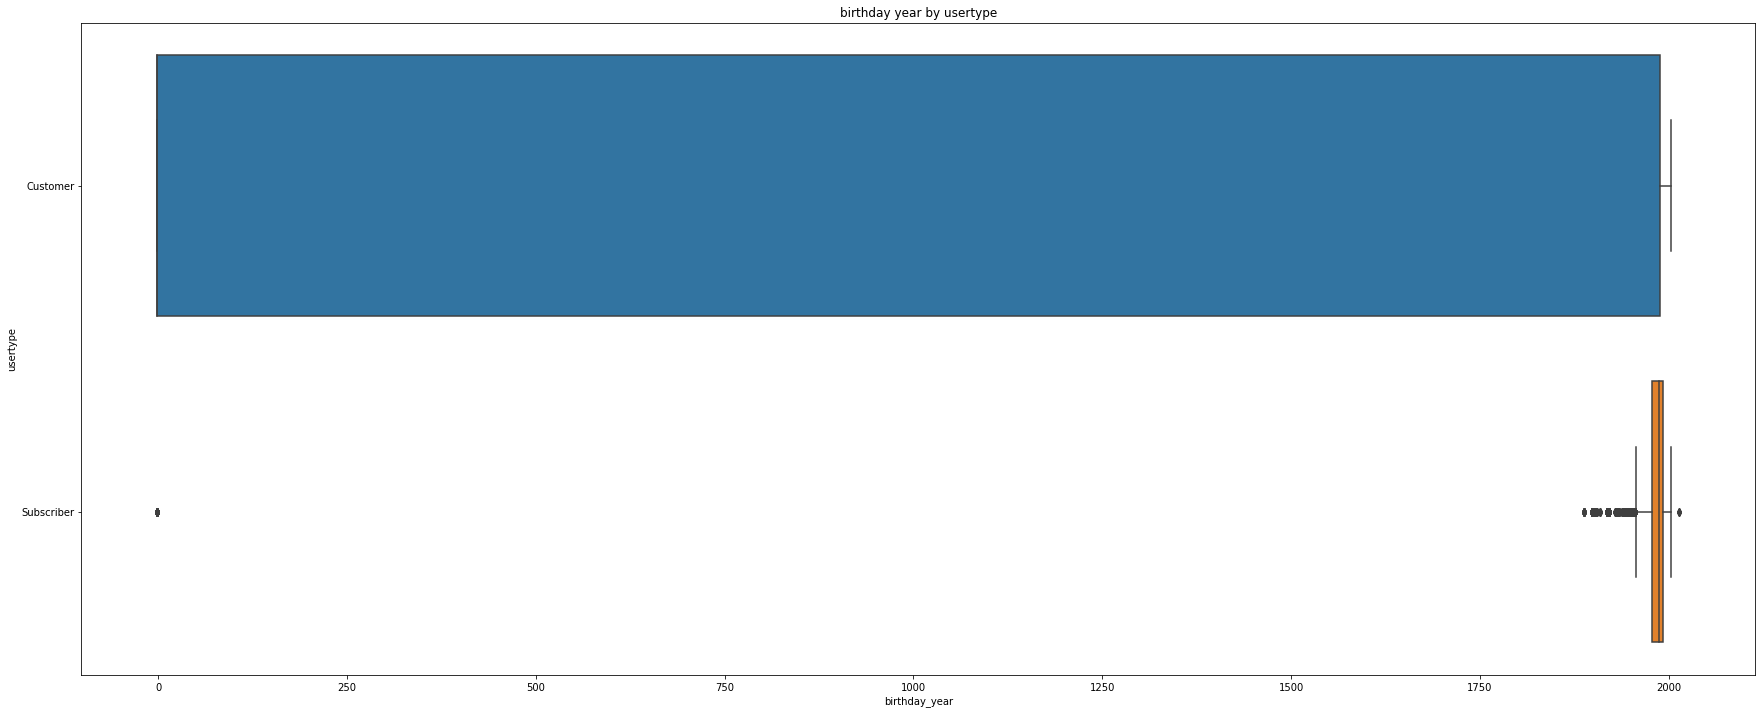

In [122]:
plt.subplots(figsize=(30, 12))
sns.boxplot(data=df, y='usertype', x='birthday_year').set(title="birthday year by usertype")
plt.show();

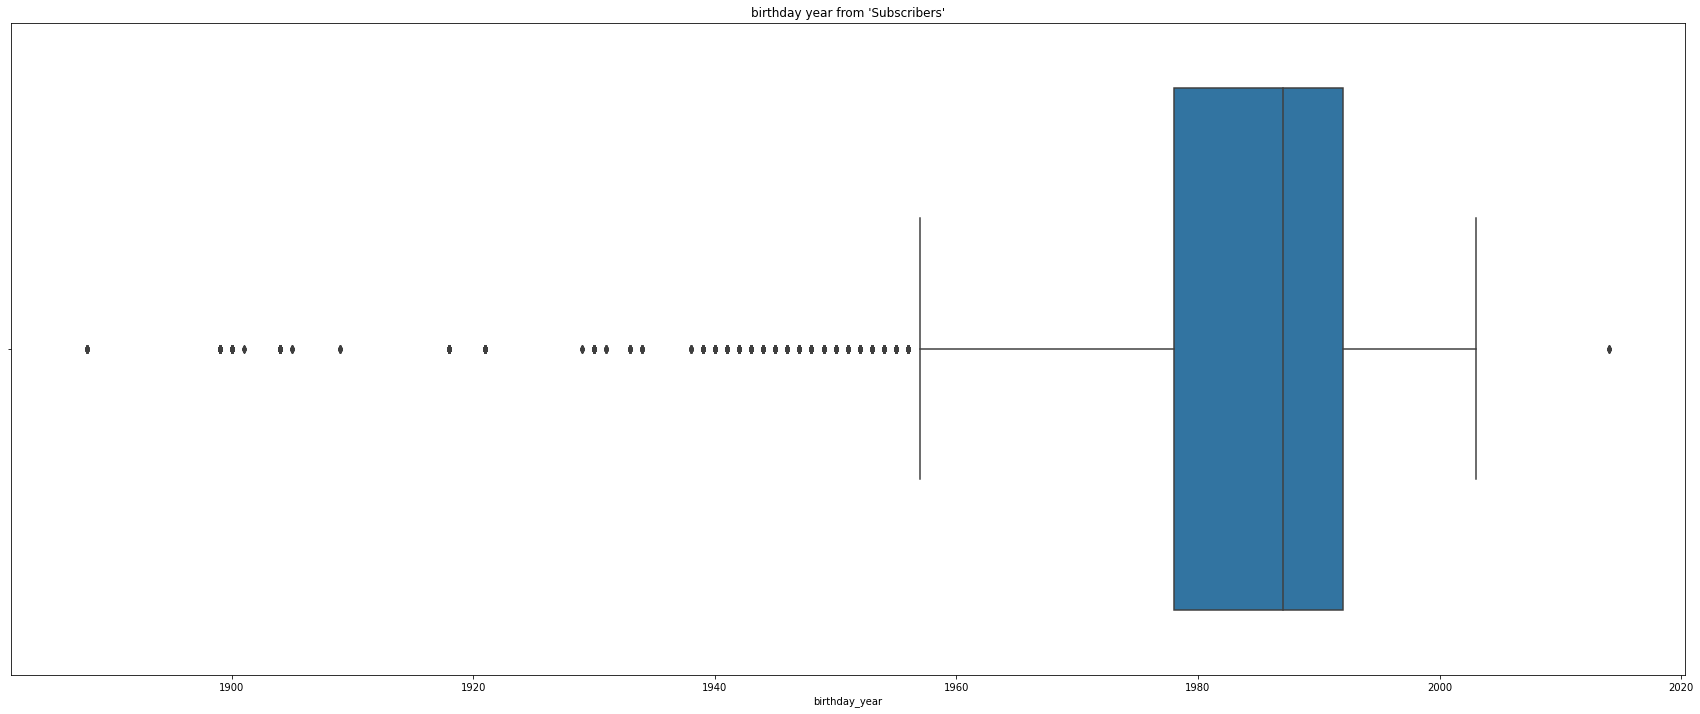

In [121]:
plt.subplots(figsize=(30, 12))
sns.boxplot(data=df.query("usertype == 'Subscriber' and birthday_year >= 1750"), x='birthday_year').set(title="birthday year from 'Subscribers'")
plt.show();

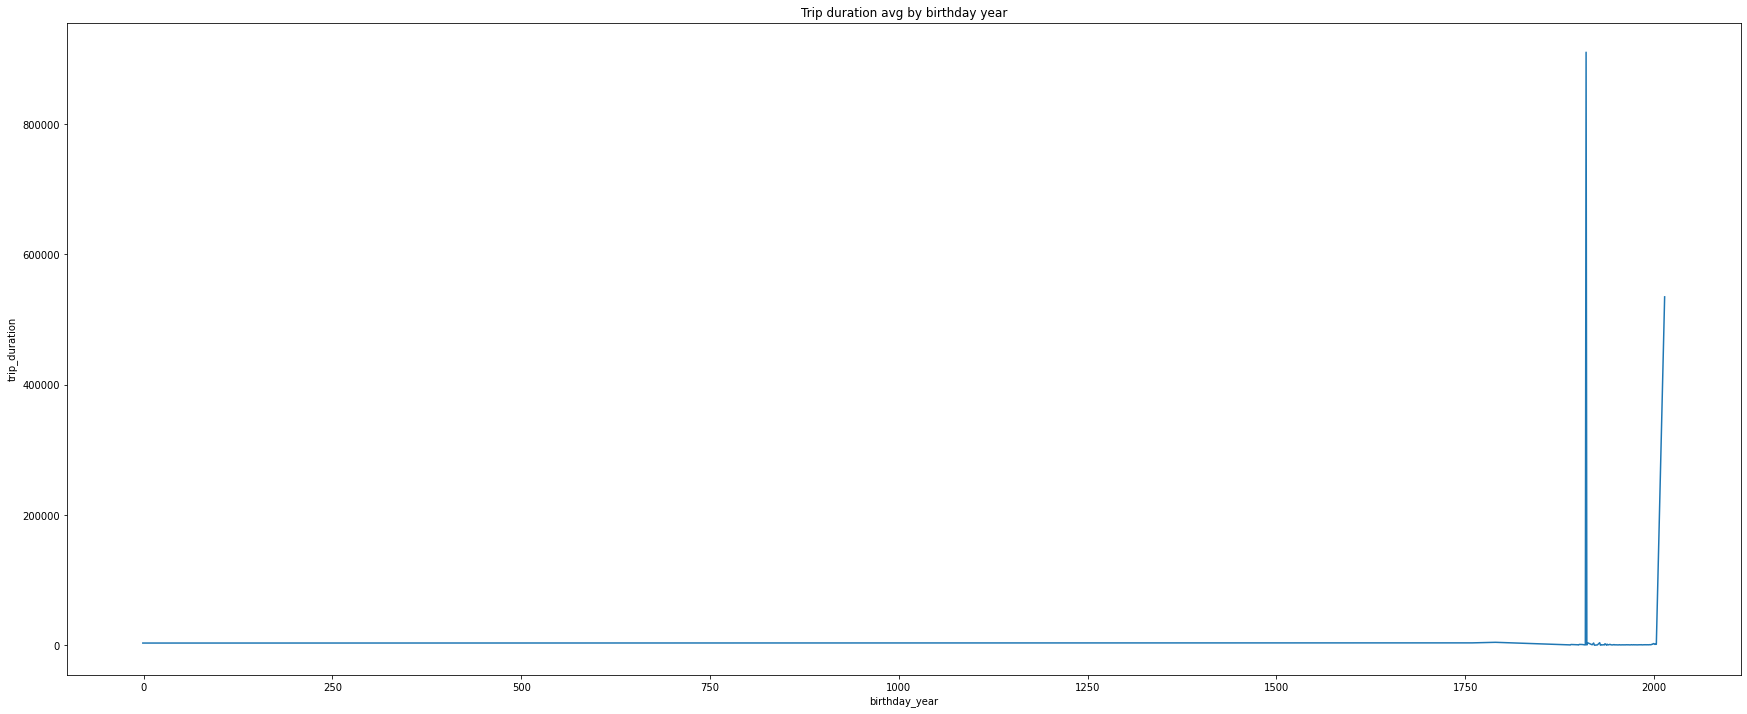

In [124]:
plt.subplots(figsize=(30, 12))
sns.lineplot(data=df.groupby('birthday_year')['trip_duration'].
    mean()).set(title="Trip duration avg by birthday year")
plt.show();

### Trip count by birthday year

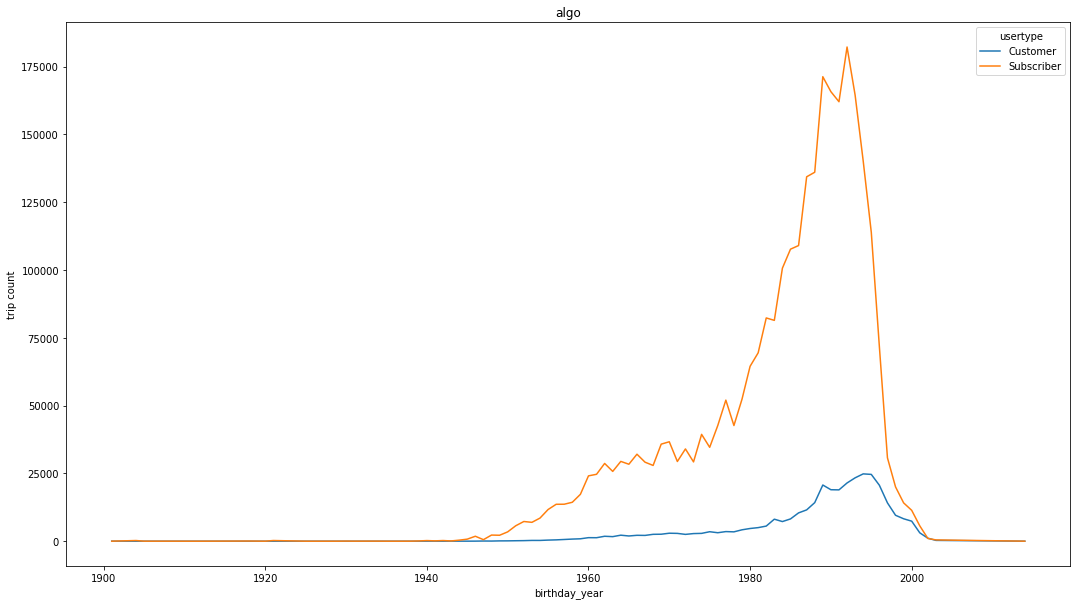

In [103]:
plt.subplots(figsize=(18, 10))
sns.lineplot(data=df_5, x='birthday_year', y='trip_duration', hue='usertype').set(title="algo")
plt.ylabel("trip count")
plt.show();

1. The people that use more frequently the service have and age between 43 to 23 years

### Avg Trip duration by birthday year

In [126]:
df.groupby(['birthday_year','usertype']).mean().reset_index()


,birthday_year,usertype,trip_id,bike_id,trip_duration,from_station_id,to_station_id
0,-1,Customer,2.390153e+07,3319.944127,3731.665339,180.138284,183.662302
1,-1,Subscriber,2.368957e+07,3343.682515,1042.116411,199.072816,193.736850
2,1759,Customer,2.296160e+07,307.000000,3970.000000,144.000000,249.000000
3,1759,Subscriber,NaN,NaN,NaN,NaN,NaN
4,1790,Customer,2.327988e+07,5618.000000,4841.000000,26.000000,77.000000
...,...,...,...,...,...,...,...
185,2002,Subscriber,2.407744e+07,3279.811265,1150.679842,202.578063,203.635375
186,2003,Customer,2.397461e+07,3377.253425,2424.640411,174.335616,159.256849
187,2003,Subscriber,2.372164e+07,3323.895299,1305.709402,187.923077,181.241453
188,2014,Customer,NaN,NaN,NaN,NaN,NaN


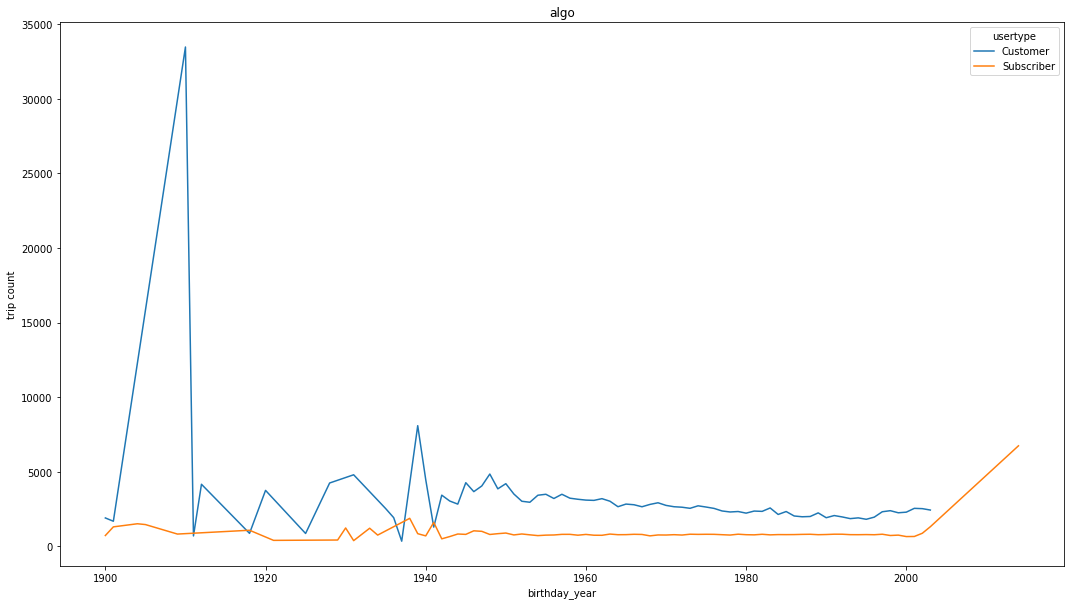

In [130]:
plt.subplots(figsize=(18, 10))
sns.lineplot(data=df.query("birthday_year >= 1900 and trip_duration <= 100000").groupby(['birthday_year','usertype']).mean().reset_index(), x='birthday_year', y='trip_duration', hue='usertype').set(title="algo")
plt.ylabel("trip count")
plt.show();

### Top 10 Busiest routes

In [131]:
df_rutas.head(10)

,Route,Frequency
1011,Lake Shore Dr & Monroe St-Streeter Dr & Grand Ave,9872
15,Streeter Dr & Grand Ave-Streeter Dr & Grand Ave,9274
4978,Lake Shore Dr & Monroe St-Lake Shore Dr & Monr...,8554
7967,Michigan Ave & Oak St-Michigan Ave & Oak St,5437
7874,Shedd Aquarium-Streeter Dr & Grand Ave,3657
261,Canal St & Adams St-Michigan Ave & Washington St,3649
960,Streeter Dr & Grand Ave-Millennium Park,3376
5125,Streeter Dr & Grand Ave-Lake Shore Dr & Monroe St,3319
3395,Streeter Dr & Grand Ave-Theater on the Lake,3317
2922,Millennium Park-Millennium Park,3082


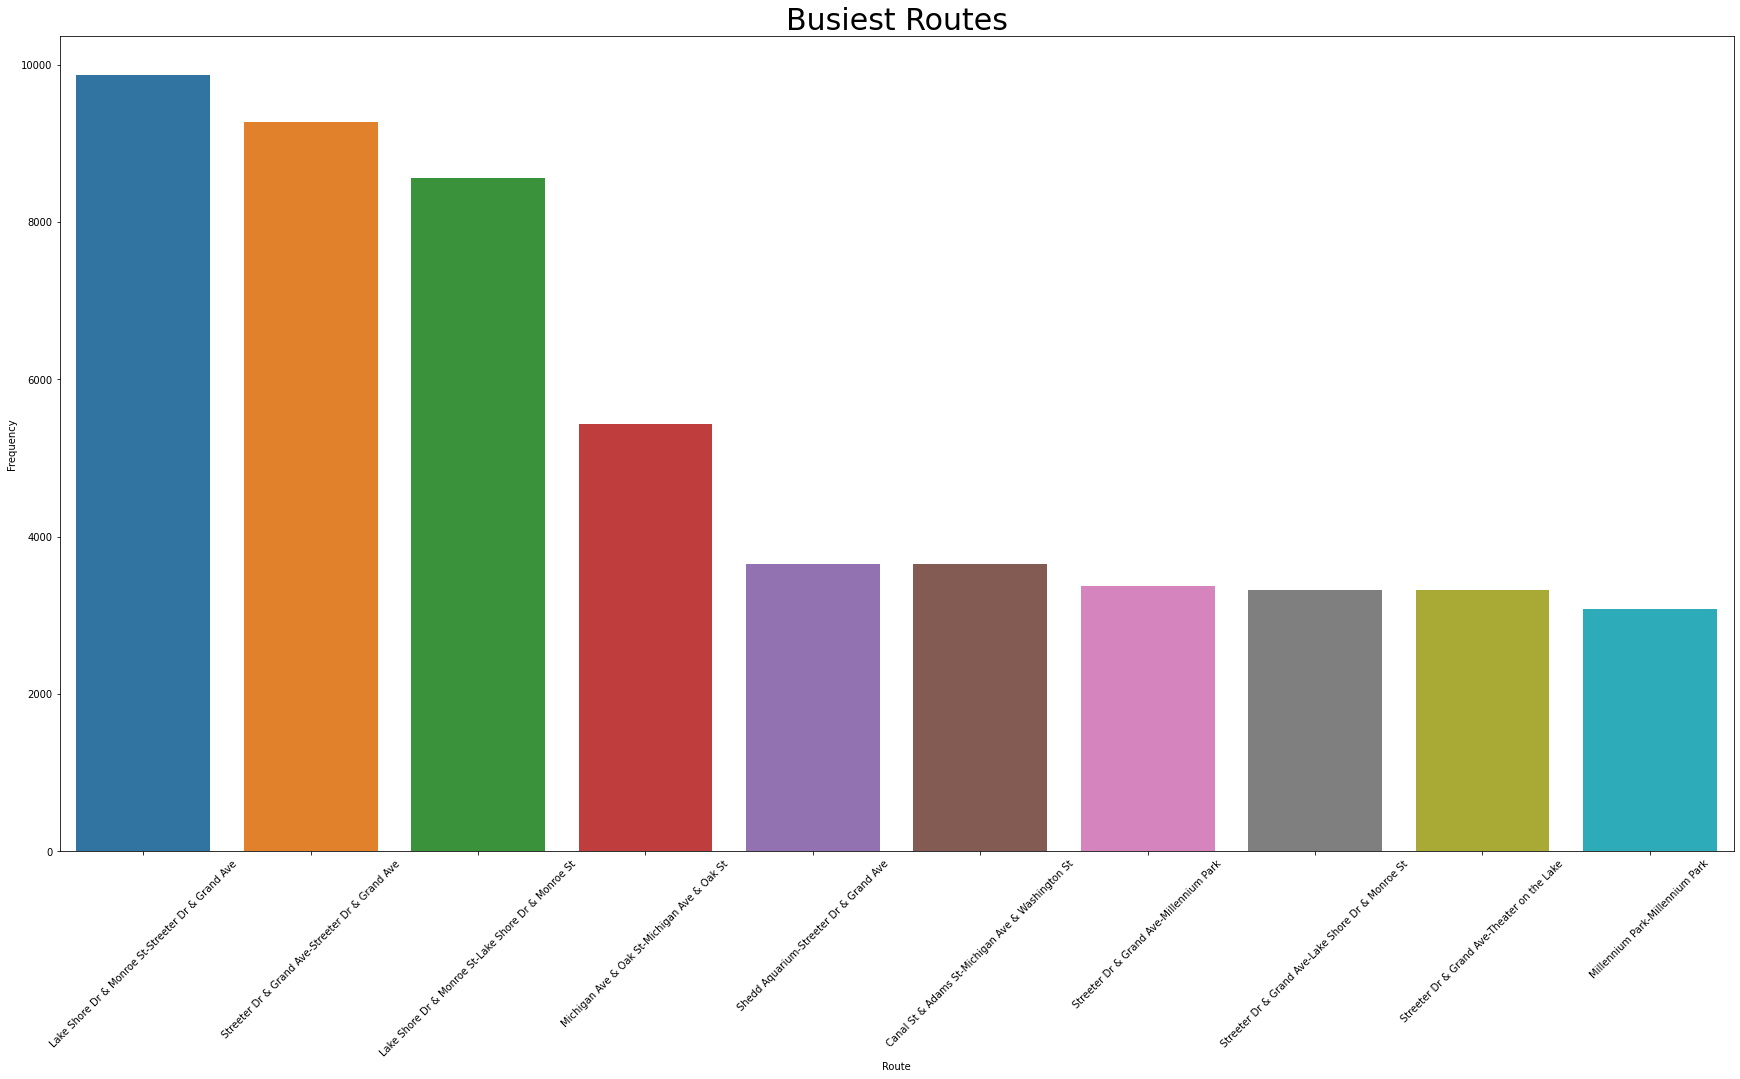

In [146]:
plt.subplots(figsize=(30, 15))
#create chart in each subplot
d = sns.barplot(data=df_rutas.head(10), x='Route', y='Frequency')
d.set_title("Busiest Routes", fontdict={'size': 30})
plt.xticks(rotation=45)
plt.show();